In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from colorama import Fore, Style

## Question 5. How much of a factor does the driver have on headway and on-time performance? 

In [2]:
df= pd.read_csv('..\data\Headway Data.csv')


In [3]:
df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,3,1.016666
1981711,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,7.633333,-2.366667,1,0,0,0,0.0,0,2,9.900000
1981712,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,1,0,0,0,NaN,0,3,0.000000
1981713,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,2,19.366666


C:\Users\Andrew\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\2598773104.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter_plot)


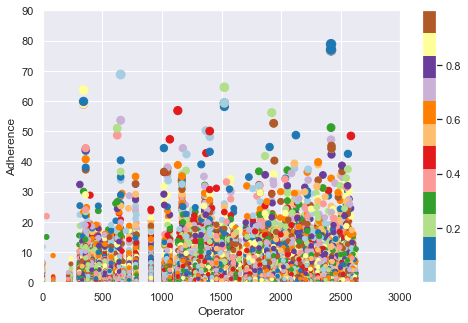

In [4]:
project_csv = pd.read_csv('../data/Headway Data.csv')
sns.set(style = 'darkgrid')

x= project_csv['OPERATOR']
y= project_csv['ADHERENCE']


fig = plt.figure(figsize = (8, 5))
ax = plt.axes()
color_map = plt.get_cmap('Paired')
colors = np.random.rand(1981715)

bottom,top = plt.ylim(0,90)
bottom,top = plt.xlim(0,3000)
ax.set_xlabel('Operator')
ax.set_ylabel('Adherence')

scatter_plot= ax.scatter(x,y, s=y+10, c=colors, cmap= color_map)


plt.colorbar(scatter_plot)

plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981715 entries, 0 to 1981714
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   CALENDAR_ID                int64  
 1   SERVICE_ABBR               int64  
 2   ADHERENCE_ID               int64  
 3   DATE                       object 
 4   ROUTE_ABBR                 int64  
 5   BLOCK_ABBR                 int64  
 6   OPERATOR                   int64  
 7   TRIP_ID                    int64  
 8   OVERLOAD_ID                int64  
 9   ROUTE_DIRECTION_NAME       object 
 10  TIME_POINT_ABBR            object 
 11  ROUTE_STOP_SEQUENCE        float64
 12  TRIP_EDGE                  int64  
 13  LATITUDE                   float64
 14  LONGITUDE                  float64
 15  SCHEDULED_TIME             object 
 16  ACTUAL_ARRIVAL_TIME        object 
 17  ACTUAL_DEPARTURE_TIME      object 
 18  ADHERENCE                  float64
 19  SCHEDULED_HDWY             float64
 20  AC

In [6]:
q_5 = df[['OPERATOR','ROUTE_ABBR','TRIP_ID','ROUTE_DIRECTION_NAME', 'HDWY_DEV', 'SCHEDULED_HDWY', 'ROUTE_STOP_SEQUENCE','TRIP_EDGE','SCHEDULED_TIME','ACTUAL_ARRIVAL_TIME','ACTUAL_DEPARTURE_TIME','ADHERENCE','ADJUSTED_LATE_COUNT']]


In [7]:
q_5

,OPERATOR,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,HDWY_DEV,SCHEDULED_HDWY,ROUTE_STOP_SEQUENCE,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_LATE_COUNT
0,2088,7,297750,TO DOWNTOWN,1.983333,14.0,4.0,1,14:10:00,13:59:21,14:12:00,-2.000000,0
1,2088,7,297750,TO DOWNTOWN,3.333333,14.0,3.0,0,14:20:00,14:23:21,14:23:21,-3.350000,0
2,2088,7,297750,TO DOWNTOWN,NaN,NaN,2.0,2,14:39:00,14:36:46,14:59:11,-20.183333,1
3,2088,50,297749,TO DOWNTOWN,NaN,NaN,7.0,1,15:10:00,15:04:31,15:10:17,-0.283333,0
4,2088,50,297749,TO DOWNTOWN,NaN,NaN,5.0,2,15:27:00,15:16:59,15:16:59,10.016666,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981710,2355,50,329980,TO DOWNTOWN,NaN,NaN,3.0,2,15:18:00,15:19:43,15:20:44,-2.733333,0
1981711,1880,50,330003,TO DOWNTOWN,-2.366667,10.0,10.0,1,15:20:00,14:57:12,15:07:06,12.900000,0
1981712,1880,50,330003,TO DOWNTOWN,NaN,NaN,4.0,2,15:37:00,15:10:16,15:10:16,26.733333,0
1981713,1922,56,330011,TO DOWNTOWN,NaN,0.0,7.0,1,15:20:00,14:59:40,15:19:02,0.966666,0


In [8]:
driver = df[['ROUTE_ABBR','OPERATOR','ADHERENCE','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]

In [9]:
df_1 = df[['OPERATOR','HDWY_DEV', 'ADHERENCE']]
df_1

,OPERATOR,HDWY_DEV,ADHERENCE
0,2088,1.983333,-2.000000
1,2088,3.333333,-3.350000
2,2088,NaN,-20.183333
3,2088,NaN,-0.283333
4,2088,NaN,10.016666
...,...,...,...
1981710,2355,NaN,-2.733333
1981711,1880,-2.366667,12.900000
1981712,1880,NaN,26.733333
1981713,1922,NaN,0.966666


In [10]:
df_1.info

<bound method DataFrame.info of          OPERATOR  HDWY_DEV  ADHERENCE
0            2088  1.983333  -2.000000
1            2088  3.333333  -3.350000
2            2088       NaN -20.183333
3            2088       NaN  -0.283333
4            2088       NaN  10.016666
...           ...       ...        ...
1981710      2355       NaN  -2.733333
1981711      1880 -2.366667  12.900000
1981712      1880       NaN  26.733333
1981713      1922       NaN   0.966666
1981714      1922       NaN   2.233333

[1981715 rows x 3 columns]>

In [11]:
df_1_gb = df_1.groupby(['OPERATOR'],as_index = False)['HDWY_DEV','ADHERENCE'].sum()

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\1246096335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_1_gb = df_1.groupby(['OPERATOR'],as_index = False)['HDWY_DEV','ADHERENCE'].sum()


In [12]:
df_1_gb 

,OPERATOR,HDWY_DEV,ADHERENCE
0,0,27.049975,-393.799982
1,30,-8.250001,36.899999
2,85,-9.833334,8.833333
3,86,-88.300006,-43.983332
4,93,12.816665,-28.166664
...,...,...,...
453,2622,-54.933463,-797.816643
454,2623,-75.050044,-67.483301
455,2624,60.749987,-156.899989
456,2630,-24.483389,-528.799957


In [13]:
df_2 = df[['OPERATOR','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT']]
df_2

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
0,2088,1,0,0
1,2088,1,0,0
2,2088,0,0,1
3,2088,1,0,0
4,2088,1,0,0
...,...,...,...,...
1981710,2355,1,0,0
1981711,1880,0,1,0
1981712,1880,0,1,0
1981713,1922,1,0,0


In [14]:
df_2.columns=['operator','on_time','early','late']

In [15]:
time = df_2.groupby(['operator'],as_index = False)['operator','on_time', 'early', 'late'].sum()
time

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\3261258232.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time = df_2.groupby(['operator'],as_index = False)['operator','on_time', 'early', 'late'].sum()


,operator,on_time,early,late
0,0,98,1,26
1,60,0,2,0
2,85,0,1,0
3,4730,24,3,1
4,558,5,0,1
...,...,...,...,...
453,1428990,429,20,52
454,524600,195,2,3
455,107584,31,0,10
456,599640,190,10,28


In [16]:
time_2 = df_2.groupby(['operator'],as_index = False)['operator','on_time', 'early', 'late'].mean()
time_2

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\3155442973.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_2 = df_2.groupby(['operator'],as_index = False)['operator','on_time', 'early', 'late'].mean()


,operator,on_time,early,late
0,0.0,0.662162,0.006757,0.175676
1,30.0,0.000000,1.000000,0.000000
2,85.0,0.000000,1.000000,0.000000
3,86.0,0.436364,0.054545,0.018182
4,93.0,0.833333,0.000000,0.166667
...,...,...,...,...
453,2622.0,0.787156,0.036697,0.095413
454,2623.0,0.975000,0.010000,0.015000
455,2624.0,0.756098,0.000000,0.243902
456,2630.0,0.833333,0.043860,0.122807


In [17]:
time_sum = df_2.groupby(['operator'],as_index = False)['operator','on_time', 'early', 'late'].sum()
time_sum

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\3877985256.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  time_sum = df_2.groupby(['operator'],as_index = False)['operator','on_time', 'early', 'late'].sum()


,operator,on_time,early,late
0,0,98,1,26
1,60,0,2,0
2,85,0,1,0
3,4730,24,3,1
4,558,5,0,1
...,...,...,...,...
453,1428990,429,20,52
454,524600,195,2,3
455,107584,31,0,10
456,599640,190,10,28


In [18]:
time_sum['total'] = (time_sum['on_time'] + time_sum['early'] + time_sum['late'])

In [19]:
time_sum


,operator,on_time,early,late,total
0,0,98,1,26,125
1,60,0,2,0,2
2,85,0,1,0,1
3,4730,24,3,1,28
4,558,5,0,1,6
...,...,...,...,...,...
453,1428990,429,20,52,501
454,524600,195,2,3,200
455,107584,31,0,10,41
456,599640,190,10,28,228


In [20]:
time_sum['pct_on_time'] = round((time_sum['on_time']/time_sum['total'])*100,0)

In [21]:
time_sum.head(10)

,operator,on_time,early,late,total,pct_on_time
0,0,98,1,26,125,78.0
1,60,0,2,0,2,0.0
2,85,0,1,0,1,0.0
3,4730,24,3,1,28,86.0
4,558,5,0,1,6,83.0
5,3900,14,0,6,20,70.0
6,5088,15,1,8,24,62.0
7,30820,128,0,5,133,96.0
8,9165,39,0,0,39,100.0
9,242,1,0,0,1,100.0


In [46]:
time_pct = time_sum[['operator','pct_on_time']]

In [48]:
time_pct

,operator,pct_on_time
0,0,78.0
1,60,0.0
2,85,0.0
3,4730,86.0
4,558,83.0
...,...,...
453,1428990,86.0
454,524600,98.0
455,107584,76.0
456,599640,83.0


C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\1560676684.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter_plot)


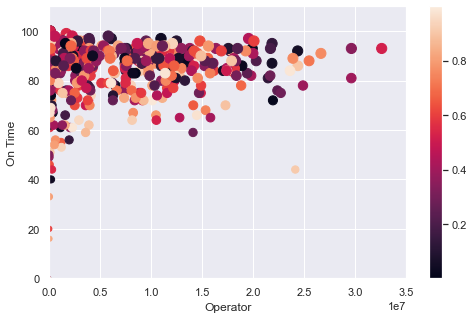

In [59]:
scatter = time_pct
sns.set(style = 'darkgrid')

x= scatter['operator']
y= scatter['pct_on_time']


fig = plt.figure(figsize = (8, 5))
ax = plt.axes()
color_map = plt.get_cmap('Paired')
colors = np.random.rand(458)

bottom,top = plt.ylim(0,110)
bottom,top = plt.xlim(0,35000000)
ax.set_xlabel('Operator')
ax.set_ylabel('On Time')

scatter_plot= ax.scatter(x,y, s=y+10, c=colors)


plt.colorbar(scatter_plot)

plt.show()

In [60]:
time_pct = time_sum.groupby(['pct_on_time'],as_index = False)['operator'].count()

In [61]:
time_pct

,pct_on_time,operator
0,0.0,4
1,16.0,1
2,20.0,1
3,33.0,1
4,40.0,2
5,44.0,2
6,46.0,1
7,49.0,1
8,50.0,2
9,51.0,1


<AxesSubplot:>

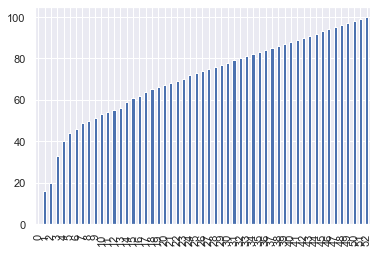

In [62]:
time_pct['pct_on_time'].plot(kind='bar')

In [63]:
time_pct_10 = time_pct.nlargest(10,'pct_on_time')

<AxesSubplot:>

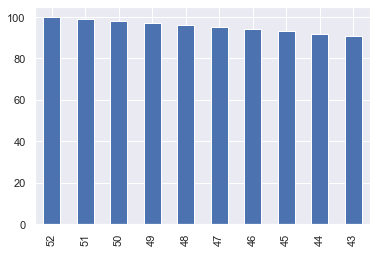

In [64]:

time_pct_10['pct_on_time'].plot(kind='bar')

C:\Users\Andrew\AppData\Local\Temp\ipykernel_19288\620034569.py:21: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(scatter_plot)


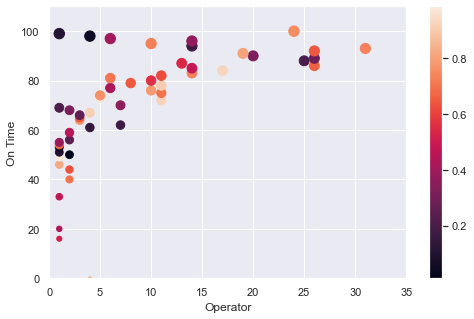

In [84]:
scatter = time_pct
sns.set(style = 'darkgrid')

x= scatter['operator']
y= scatter['pct_on_time']


fig = plt.figure(figsize = (8, 5))
ax = plt.axes()
color_map = plt.get_cmap('Paired')
colors = np.random.rand(53)

bottom,top = plt.ylim(0,110)
bottom,top = plt.xlim(0,35)
ax.set_xlabel('Operator')
ax.set_ylabel('On Time')

scatter_plot= ax.scatter(x,y, s=y+10, c=colors)


plt.colorbar(scatter_plot)

plt.show()

In [80]:
time_pct_1 = time_sum.groupby(['pct_on_time'],as_index = False).count()

In [81]:
time_pct_2= time_pct_1.groupby(['operator'],as_index = False)['pct_on_time'].count()

In [82]:
time_pct_2

,operator,pct_on_time
0,1,11
1,2,6
2,3,3
3,4,4
4,5,2
5,6,3
6,7,2
7,8,1
8,10,3
9,11,4
